This notebook will test using the package echoSMs to run the DWBA model on an average copepod ($\textit{Calanus finmarchicus}$) in Frohavet

In [1]:
import echosms
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geomdl as geo

## Define parameters

In [37]:
p = {'medium_rho': 1027.8,
     'medium_c': 1480,
     'a': np.arange(3.0, 3.3, 0.01)/2*0.001,
     'b': 0.001,
     'boundary_type': 'fluid filled',
     'target_rho': 1025, #Kogeler 1987
     'target_c': 1520, #Kogeler 1987
     'theta': 90,
     'phi': 0,
     'f': np.arange(180, 220, 10)*1000}

## Import shape

In [38]:
fn = '../phd/ZooScatStuff/Shapes/Copepod_KB3_TT_150122_0134.sat'

In [39]:
s = pd.read_csv(fn, delimiter=' ', names=['y', 'x', 'a'])

# Adjust the data to match the echoSMs units
s /= 1000  # convert mm to m

# .sat files don't have a z coordinate but echoSMs requires it
s['z'] = 0.0

# An example of flipping left to right to match the echoSMS coordinate system
s['x'] = max(s['x']) - s['x']

shape = echosms.create_dwba_from_xyza(s['x'], s['y'], s['z'], s['a'], name=fn, g=1.05, h=1.05)

In [40]:
p['rv_pos'] = shape.rv_pos
p['rv_tan'] = shape.rv_tan
p['a'] = shape.a

In [41]:
p['a'].max()


0.000523194448666318

## Select model
We will use DWBA to start

In [42]:
model = echosms.DWBAModel()
ts_df = model.calculate_ts(p, expand=True)
ts_df

,medium_rho,medium_c,b,boundary_type,target_rho,target_c,theta,phi,f,ts
0,1027.8,1480,0.001,fluid filled,1025,1520,90,0,180000,-108.358023
1,1027.8,1480,0.001,fluid filled,1025,1520,90,0,190000,-107.481345
2,1027.8,1480,0.001,fluid filled,1025,1520,90,0,200000,-106.656385
3,1027.8,1480,0.001,fluid filled,1025,1520,90,0,210000,-105.878466


## Plot

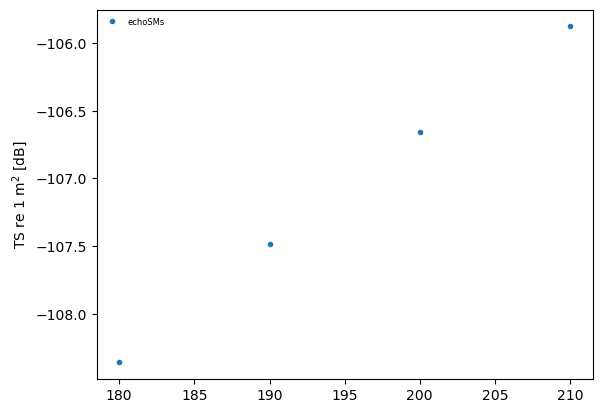

In [43]:
fig, ax = plt.subplots(1, 1, sharex=True)

ax.plot(ts_df['f']/1e3, ts_df['ts'], '.', label='echoSMs')
ax.set_ylabel('TS re 1 m$^2$ [dB]')
ax.legend(frameon=False, fontsize=6)
